In [1]:
import mne
import matplotlib.pyplot as plt
from nilearn.masking import apply_mask, compute_epi_mask
import numpy as np

path_eeg = '/home/david/eeg_informed_fmri/datasets/'

dataset = '01/fMRI/'

individual = '35/'

fmri_file = '3_nw_mepi_rest_with_cross.nii.gz'

complete_path = path_eeg + dataset + individual + fmri_file

/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


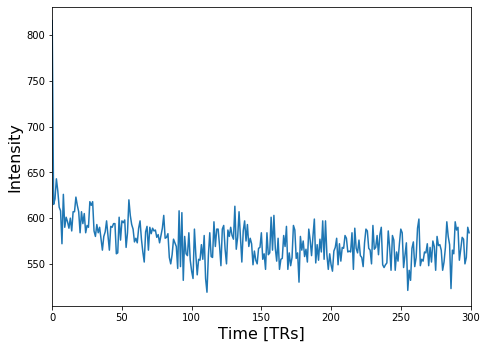

In [2]:
mask_img = compute_epi_mask(complete_path)

masked_data = apply_mask(complete_path, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels



# And now plot a few of these
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:, 5:6])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, masked_data.shape[0])
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

In [59]:
import numpy as np

from nilearn import _utils

import nilearn.image as image
from nilearn.decomposition import CanICA
from nilearn.input_data import NiftiMasker

from nilearn.image import new_img_like

from nilearn.masking import _apply_mask_fmri

from nilearn.plotting import plot_stat_map

#when its a population of n individuals
#imgs=[complete_path_ind_1, complete_path_ind_2, ..., complete_path_ind_n]
def _apply_mask(imgs, mask_img):
    mask_img = _utils.check_niimg_3d(mask_img)
    
    mask_img = _utils.check_niimg_3d(mask_img)
    mask = mask_img.get_data()
    mask = _utils.as_ndarray(mask, dtype=bool)
    
    mask_img = new_img_like(mask_img, mask, mask_img.affine)
    
    return _apply_mask_fmri(imgs, mask_img, dtype='f', smoothing_fwhm=None, ensure_finite=True)


class roi_time_series:
    def __init__(self, canica=None):
        self.canica = None
        
    def _set_ICA(self, imgs, n_components=20, verbose=0):
        self.canica = CanICA(n_components=n_components, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=verbose, random_state=0)
        self._fit_ICA(imgs)
        
    def _fit_ICA(self, imgs):
        self.canica.fit(imgs)
        
    def get_ROI_time_series(self, imgs, component=0, n_components=20, verbose=False):

        #smooth image
        fmri_original = image.load_img(imgs)
        fmri_img = image.smooth_img(fmri_original, fwhm=6)

        #perform ICA and get components
        if(self.canica == None):
            if(verbose):
                print("New ICA computation")
            self._set_ICA(fmri_img, n_components=n_components)

        components_img = self.canica.components_img_

        #build masker
        roi_masker = NiftiMasker(mask_img=image.index_img(components_img, component),
                            standardize=True,
                            memory="nilearn_cache",
                            smoothing_fwhm=8)

        return _apply_mask(imgs, roi_masker.mask_img)

In [66]:
roi_extraction.get_ROI_time_series(complete_path, component=0, n_components=30).shape

(300, 3147)

/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/nilearn/plotting/displays.py:591: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


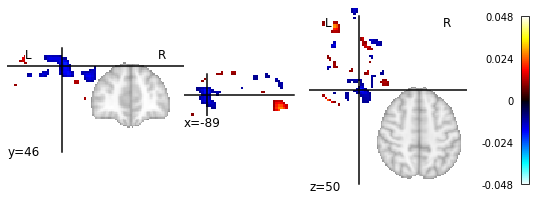

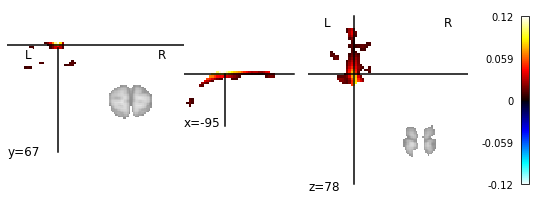

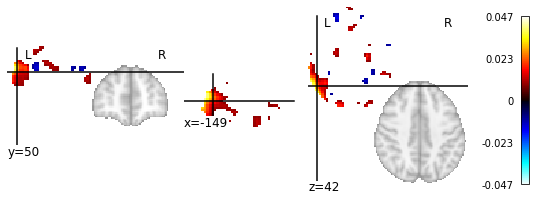

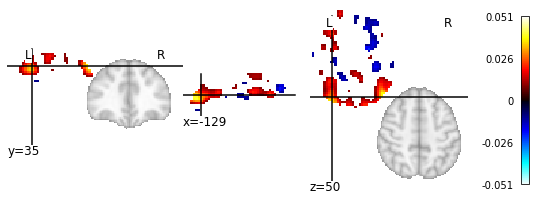

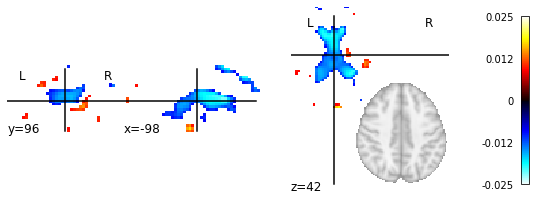

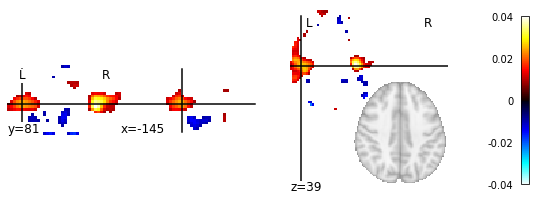

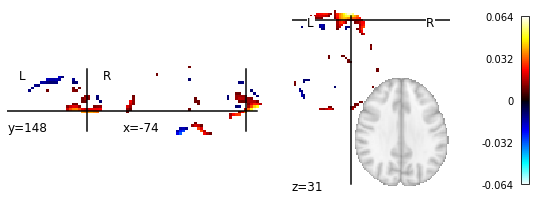

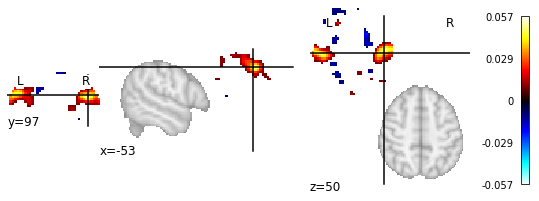

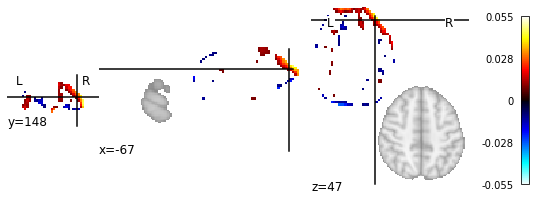

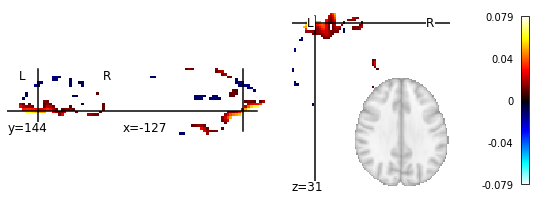

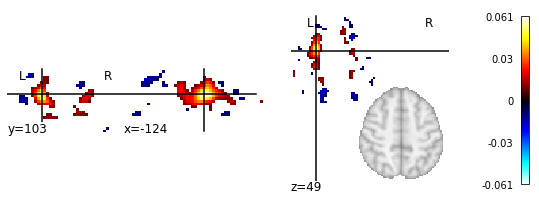

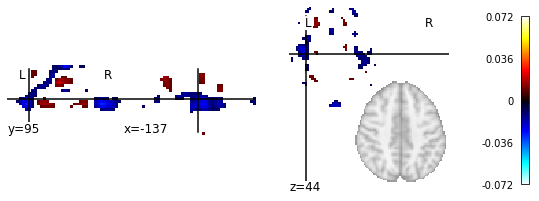

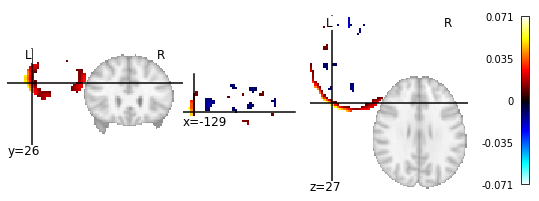

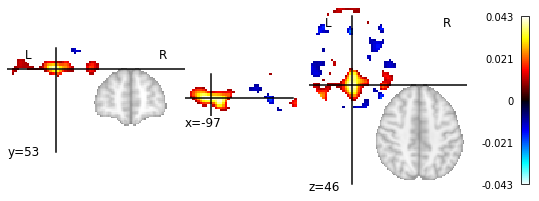

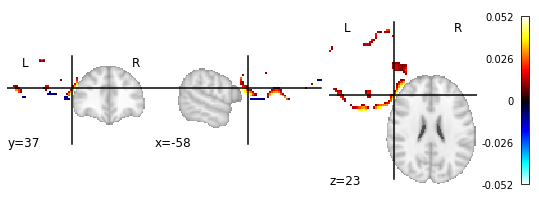

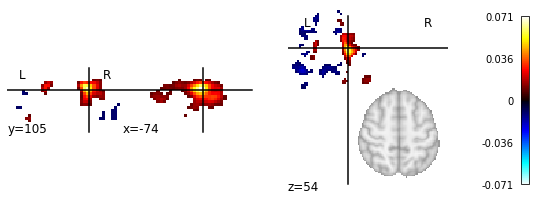

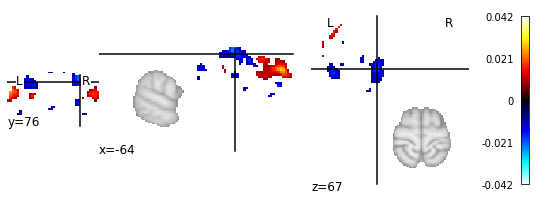

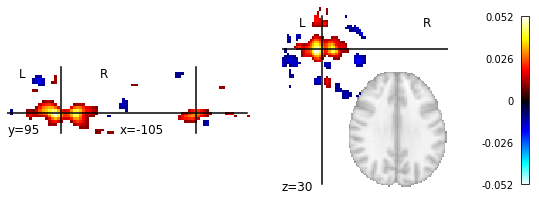

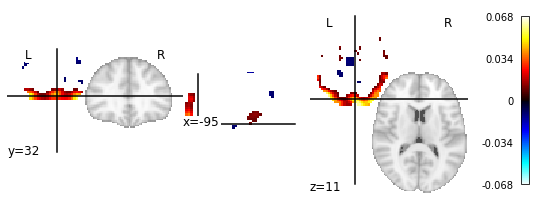

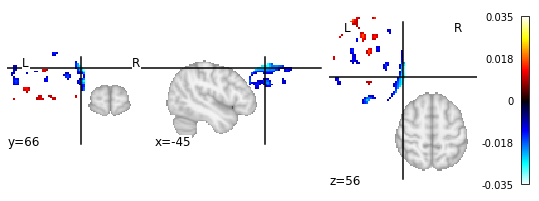

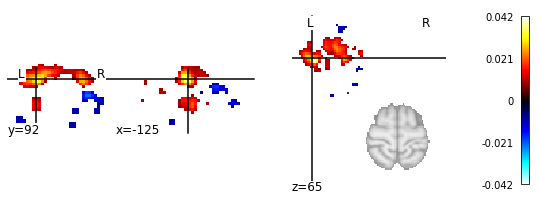

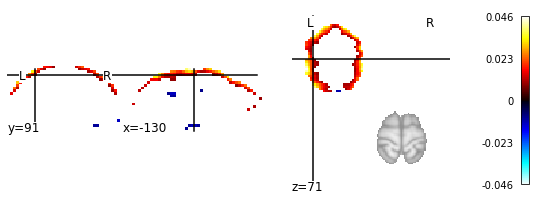

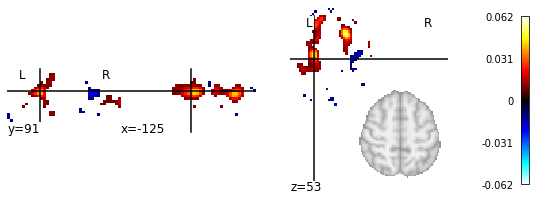

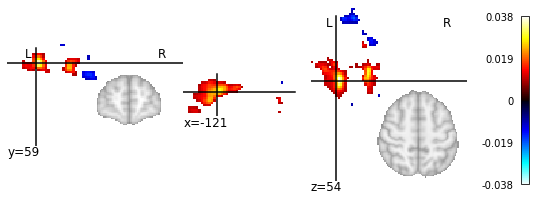

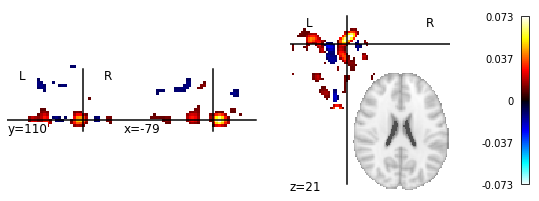

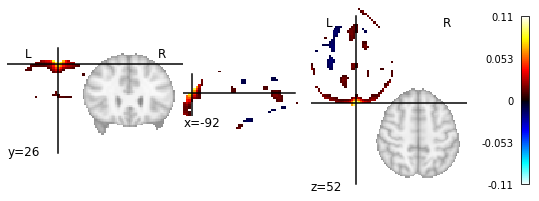

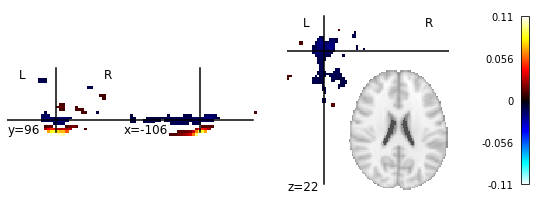

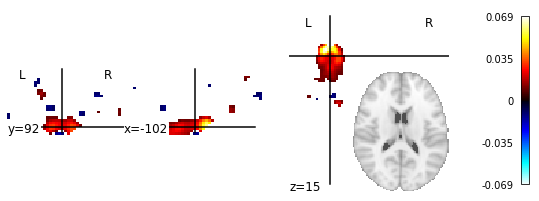

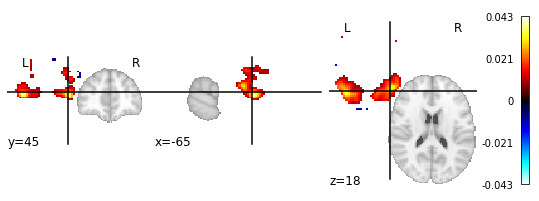

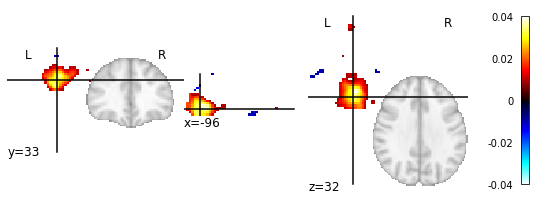

In [49]:
for component in range(components_img.shape[-1]):
    plot_stat_map(image.index_img(components_img, component))